# Homework 5 - Clustering
## CSCI 5622 - Spring 2020
***
**Name**: $<$Preethi Vijai Lilly$>$ 

***

This assignment is due on Canvas by **11.59 PM on Monday, April 27th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [115]:
class DataIris:
    def __init__(self):
        data = load_iris()
        self.data = data.data[:, [1, 3]]
        self.target = data.target

# Part 1 [65 Pts]: K-means clustering


> First, we're going to build an implementation of K-means clustering as discussed in lecture. We will cluster a reduced form of the Iris dataset with a dimensionality of $d=2$ found in class `IrisData` above. <br>

Tasks :
Implement K-means clustering by completing the code in the class below : 

- [10 points] `initialize_centroids` : select K distinct points from the dataset `X` passed in the constructor and use them as the initial centroids. Store these centroids in the class variable `self.centroids` as an `np.array` of shape $K \times d$ where the $i$-th row represents a centroid and its would be class label is also $i$
- [10 points] `compute_distances` : compute the distance of each point $x_i$ to every centroid $m_k$ and return the result as a matrix `distance_matrix` of size $N \times K$ where N is the number of points and K is the chosen number of clusters to be found. A cell `(i,k)` shall contain the euclidean distance between point $x_i$ and centroid $m_k$
- [10 points] `compute_cluster_assignment` : given the distance matrix of size $N \times K$ return a array of labels in which each element is an integer in the range $[0, K-1]$ and it represents which centroid in the centroid array `self.centroids` that point belongs to.
- [10 points] `compute_centroids` : You shall have the new assignment of clusters contained in the incoming `labels` array to your $N$ points. Compute the new centroids depending on the new set of points that has been alloted to each cluster. 
- [10 points] `cluster` : This shall contain you main loop which implements the algorithm described above. You shall sequentially call the methods above to find the $K$ centroids(or means). Keep performing this loop until one of the following conditions is met: 1) you perform `epochs` number of iterations; or 2) the average euclidian difference between old and new centroids goes below 0.01. At the end of each epoch call the method `show_progress()` to show where the centroids are after making the necessary updates.
- [The Elbow Analysis function is used in the bonus problem below]

In [155]:
class KMeansClustering:
    def __init__(self, X, K):
        '''
        Params : 
            X : (np.ndarray) of dimension (N, d) N is the number of points
            K : (int) number of means/centroids to evaluate
            epochs : (int) maximum number of epochs to evaluate for the centroids
        '''
        self.X = X
        self.K = K
        self.centroids = self.initialize_centroids()
        
        
    def initialize_centroids(self):
        '''
        Randomly select K distinct points from the dataset in self.X
        Params : 
            None
        RETURN :
            means : (np.ndarray) of the dimension (K, d)
        '''
        self.centroids = self.X.copy()
        np.random.shuffle(self.centroids)
        return self.centroids[:self.K]
    
    def compute_distances(self):
        '''
        Comupute a distance matrix of size (N, K) where each cell (i, j) represents the distance between 
        i-th point and j-th centroid. We shall use Euclidean distance here.
        
        PARAMS:
            centroids : (np.ndarray) of the dimension (K, d)
        RETURN:
            distance_matrix : (np.ndarray) of the dimension (N, K)
        '''
        distance_matrix = np.sqrt(((self.X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return distance_matrix
    
    def compute_cluster_assignment(self, distance_matrix):
        '''
        Comupute a distance matrix of size (N, K) where each cell (i, j) represents the distance between 
        i-th point and j-th centroid. We shall use Euclidean distance here.
        
        PARAMS:
            distance_matrix : (np.ndarray) of the dimension (N, K)
        RETURN:
            labels : (np.ndarray) of the size (N)
        '''
        labels = np.argmin(distance_matrix, axis=0)
        return labels
    
    def compute_centroids(self, labels):
        '''
        Randomly select K distinct points from the dataset in self.X
        Params : 
            labels : (np.ndarray) of the dimension (N) where each i-th item reperesents the closest
            centroid among the K centroids. Each value here must be between 0 and K-1.
        RETURN :
            updated_means : (np.ndarray) of the dimension (K, d)
        '''
        updated_means = np.array([self.X[labels==k].mean(axis=0) for k in range(self.centroids.shape[0])])
        return updated_means
    
    def convert_to_2d_array(self,points):
        """
        Converts `points` to a 2-D numpy array.
        """
        points = np.array(points)
        if len(points.shape) == 1:
            points = np.expand_dims(points, -1)
        return points
    
    def SSE(self,points):
        """
        Calculates the sum of squared errors for the given list of data points.
        """
        points = self.convert_to_2d_array(points)
        centroid = np.mean(points, 0)
        errors = np.linalg.norm(points-centroid, ord=2, axis=1)
        return np.sum(errors)
    
    def distance(self, a, b, ax=1):
        return np.linalg.norm(a - b, axis=ax)
   
    
    def cluster(self, epochs):
        '''
        Implement the K-means algorithm here as described above. However loop for a maximum of self.epochs.
        Ensure that you have a condition that checks whether the epochs have changed since the last epoch or not
        For this use a threshold of change of 0.01.
        
        PARAMS:
            epochs : (integer) maximum number of epochs
        RETURN:
            centroids : (np.ndarray) of the size (K, d) also store in a class variable self.centroids
        '''
        best_sse = np.inf
        for ep in range(epochs):
            distance_matrix = np.sqrt(((self.X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distance_matrix, axis=0)
            new_centroids = np.array([self.X[labels==k].mean(axis=0) for k in range(self.centroids.shape[0])])
            err = self.distance(self.centroids, new_centroids, None)
            if err <= 0.01:
                break
            self.centroids = new_centroids
            self.show_progress(ep)
        return self.centroids, labels
            
            
    
    def show_progress(self, epoch):
        '''
        PARAMS:
            epoch : (integer) tells which epoch is it
        RETURN:
            None
        '''
        plt.plot(self.X[:, 0], self.X[:, 1], 'o', color='y')
        for i in range(self.K):
            plt.plot(self.centroids[i, 0], self.centroids[i, 1], 'o', color='k')
        plt.title('Centroids at epoch : {}'.format(epoch))
        plt.show()
        for i in range(self.K):
            plt.plot(self.centroids[i, 0], self.centroids[i, 1], 'o', color='k')
        plt.title('Centroids at epoch : {}'.format(epoch))
        plt.show()
        
    
        
    def elbow_analysis(self, k_range):
        '''
        PARAMS:
            k_range : (list of +ve integers) contains the K number of hyperparameters k to peform 
            the analysis over
        RETURN:
            avg_variance : (list of float) list od size K. contains the average variance of clusters corresponding to each 
            to each hyperparameter k
        '''
        C, avg_variance = [0 for k in range(k_range)], [0 for k in range(k_range)]
        for k in range(1, k_range):
            for i in range(20):
                self.K = k
                self.initialize_centroids()
                curr_centroids = self.centroids
                newCentroids = np.zeros(self.K)
                distance_matrix = self.compute_distances()
                labels = self.compute_cluster_assignment(distance_matrix)
                newCentroids = self.compute_centroids(labels)
                self.centroids = newCentroids

            var = 0
            
            for j in range(len(self.X)):
                points = []
                if labels[j] == i:
                    points.append(self.X[j])
                points = np.array(points)
                for m in range(len(points)):
                    dist = 0
                    dist = self.distance(points[m], newCentroids[i], None)
                    var += (dist ** 2)
                var = var / k
            avg_variance[k]=(var)
        return avg_variance
    

In [156]:
import unittest

class KMeansTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([[0.1, 0.3], [0.4, 0.6], [0.2, 0.4], [3.1, 3.1], [3.5, 2.9]])
        self.cluster_obj_1 = KMeansClustering(self.X, 2)
        self.cluster_obj_2 = KMeansClustering(self.X, 2)
        self.cluster_obj_3 = KMeansClustering(self.X, 2)
        self.cluster_obj_4 = KMeansClustering(self.X, 2)
        
    def test_initialize_centroids(self):
        """
        Test initialize_centroids function from KMeansClustering
        """
        means = self.cluster_obj_1.initialize_centroids()
        self.assertEqual(means.shape[0], 2)
        self.assertEqual(means.shape[1], 2)
        
    def test_compute_distances(self):
        """
        Test compute_distances function from KMeansClustering
        """
        self.cluster_obj_2.centroids = self.X[:2, :]
        distance_matrix = self.cluster_obj_2.compute_distances()
        self.assertEqual(round(distance_matrix[0,0], 2), 0.0)
        self.assertEqual(round(distance_matrix[0,1], 2), 0.42)
        
    def tests_compute_cluster_assignment(self):
        """
        Test compute_cluster_assignment function from KMeansClustering
        """
        self.cluster_obj_3.centroids = self.X[:2, :]
        distance_matrix = self.cluster_obj_3.compute_distances()
        labels = self.cluster_obj_3.compute_cluster_assignment(distance_matrix)
        self.assertEqual(labels[0], 0)
        self.assertEqual(labels[1], 1)
        self.assertEqual(labels[2], 0)
        
    def test_compute_centroids(self):
        """
        Test compute_centroids function from KMeansClustering
        """
        self.cluster_obj_4.centroids = self.X[:2, :]
        distance_matrix = self.cluster_obj_4.compute_distances()
        labels = self.cluster_obj_4.compute_cluster_assignment(distance_matrix)
        new_means = self.cluster_obj_4.compute_centroids(labels)
        self.assertEqual(round(new_means[0, 0], 2), 0.15)
        self.assertEqual(round(new_means[0, 1], 2), 0.35)
        
    
tests = KMeansTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

> [5 pts] In the cell below, perform K-means clustering on the `IrisData` with `K=3` for up to __20 epochs__. Plot the centroid locations at each epoch using the method `show_progress` already written for you.

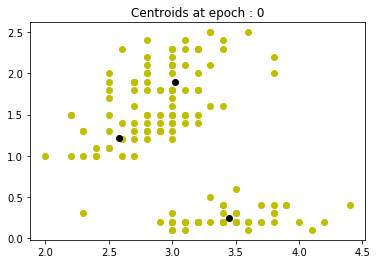

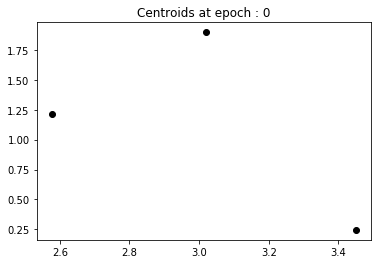

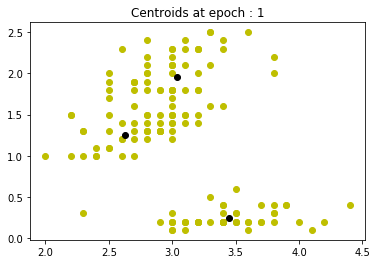

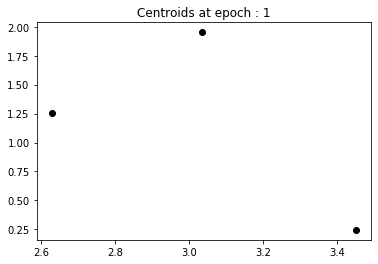

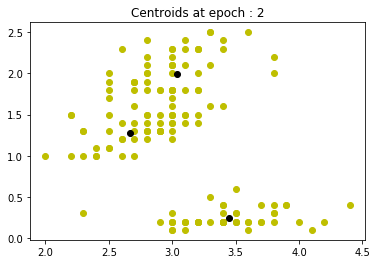

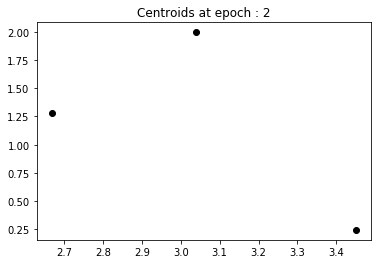

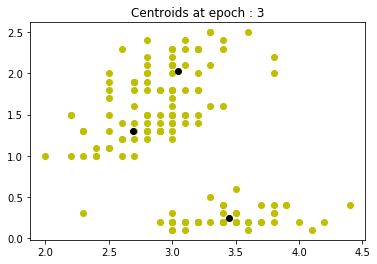

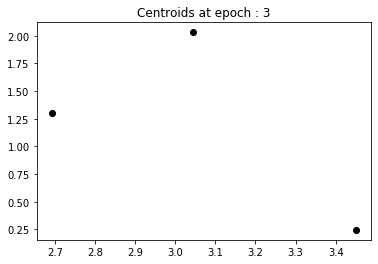

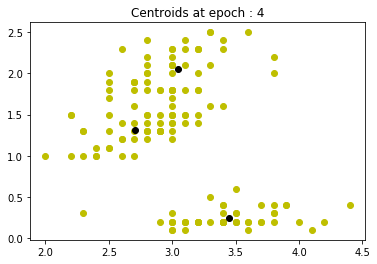

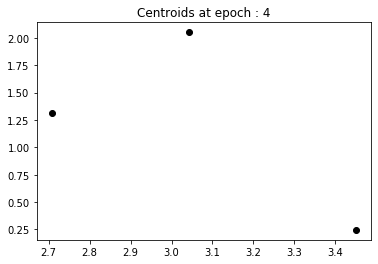

In [157]:
# YOUR CODE HERE
iris = DataIris()
model = KMeansClustering(iris.data, 3)
centroids, labels = model.cluster(20)

> [10 pts] The original Iris dataset was a labelled dataset with classes assigned to each point. The `show_progress` method plots all the points as yellow without giving points of different classes different colors along with the centroids as black points. Now that you have performed clustering, try to plot the points in the dataset along with the computed centroids, but this time color the dataset points according to their true label in `IrisData` (see the attribute `target` for true class labels in `IrisData`). Comment on what you observe in the Markdown cell following the code cell below.

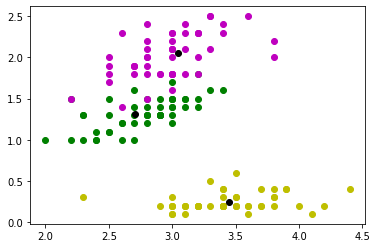

In [158]:
C = [0 for k in range(3)]

for i in range(3):
    points = []
    for j in range(len(iris.data)):
        if iris.target[j] == i:
            points.append(iris.data[j])
    
    C[i] = points
C = np.array(C)

plt.plot(C[0][:, 0], C[0][:, 1], 'o', color='y')
plt.plot(C[1][:, 0], C[1][:, 1], 'o', color='g')
plt.plot(C[2][:, 0], C[2][:, 1], 'o', color='m')
for i in range(3):
    plt.plot(centroids[i, 0], centroids[i, 1], 'o', color='k')
    
plt.show()

There are a lot of outliers in datapoints 1 and 2 which is causing the overlap in clusters 1 and 2

## Elbow Analysis [Bonus 15 Pts]

Our Iris dataset should have an expectation of three clusters (as seen in the match to the targets?), but we want to see if that is borne out by an Elbow Test. Add a function tpdate the elbow_analysis function in your KMeansClustering Class above to compute the average within-cluster variance, run this within cluster variance for k = 1 to k = 10 and plot the results below, and discuss your results.

In [169]:


#Write Your Code Here
iris = DataIris()
model = KMeansClustering(iris.data, 1)
avg_var = model.elbow_analysis(10)

epoch = []
for i in range(10):
    epoch.append(i)



/Users/preethi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice.


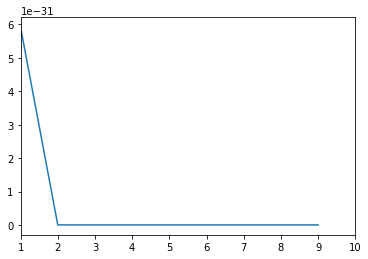

In [170]:
plt.plot(epoch, avg_var)
plt.xlim(1,10)
plt.show()

The optimal value of k is 2, according to the elbow plot in the graph above.

# 1-D data from Gaussian Distributions

In [185]:
class Data1D:
    def __init__(self):
        self.means = [-4.0, 3.5, 10.6]
        self.variances = [1.5, 1.2, 1.0]
        X = []
        for m, v in zip(self.means, self.variances):
            X += list(np.random.normal(m, np.sqrt(v), size=(100)))
        self.means, self.variances = np.array(self.means), np.array(self.variances)
        X = np.array(X)
        self.X = X

# Part 2 [35 Pts]: Gaussian Mixture Model

GMMs are based on the assumption that all data points come from a fine mixture of Gaussian distributions with unknown parameters. They are parametric generative models that attempt to learn the true data distribution. Hence, once we learn the Gaussian parameters, we can generate data from the same distribution as the source. <br>

Like K-Means, GMMs also demand the number of clusters K as an input to the learning algorithm. However, there is a key difference between the two. K-Means can only learn clusters with a circular form. GMMs, on the other hand, can learn clusters with any elliptical shape. <br>

K-Means only allows for an observation to belong to one, and only one cluster. Differently, GMMs give probabilities that relate each example with a given cluster. In other words, GMMs allow for an observation to belong to more than one cluster — with a level of uncertainty. <br>

Assuming one-dimensional data(as is the data for the problem we will solve) and the number of clusters K equals 3, GMMs attempt to learn 9 parameters.
- 3 parameters for the means i.e $\mu_k$
- 3 parameters for the variances i.e $\sigma^2_k$
- 3 scaling parameters $\phi_k$

We estimate these parameters using Expectation Maximization which works as follows:
1. First we calculate the likelihood of each point. Below is the Probability Density Function we will use to evaluate the likelihood
$$f(x|\mu_k, \sigma^2_k) = \frac{1}{\sqrt{2\pi\sigma^2_k}}exp\Big(-\frac{(x-\mu_k)^2}{2\sigma^2_k}\Big)$$

2. Next we estimate the posterior probability of each point with repect to certain cluster. This tells us what is the probability that a certain point belongs to a certain cluster
$$b_k^{(i)} = \frac{f(x^{(i)}|\mu_k, \sigma^2_k)\phi_k}{\sum_{k=1}^{K}f(x^{(i)}|\mu_k, \sigma^2_k)\phi_k}$$

3. Now we estimate the parameters as
$$\mu_k = \frac{\sum_i b_k^{(i)}x^{(i)}}{\sum_i b_k^{(i)}}$$
$$\sigma^2_k = \frac{\sum_i b_k^{(i)}(x^{(i)} - \mu_k)^2}{\sum_i b_k^{(i)}}$$
$$\phi_k = \frac{1}{N}\sum_i b_k^{(i)}$$

4. We repeat the above steps until the parameters dont change beyond a certain threshold or we reach the maximum number of epochs

> Now we shall implement Gaussian Mixture Model for a 1-D dataset composed of points from multiple Gaussian Distributions. You can find the data in `Data1D` above.
> Complete the methods below : 
- [5 points] `compute_pdf` : given a scalar value x(a 1-D point) and integer k find the value of the Probability Density Function(p.d.f) as defined above
- [5 points] `compute_pdf_matrix` : Create a matrix of size $N\times K$ which contains the p.d.f value for every  point w.r.t each cluster
- [5 points] `compute_posterior` : Given the p.d.f matrix computed from previous function, now create a matrix of size $N\times K$ which contains the posterior probability value for every  point w.r.t each cluster as using the formula described above
- [5 points] `reestimate_params` : Given the posterior probability matrix, re-estimate the 3 sets of parameters 
- [5 points] `exp_maximize` : the main training loop that runs for `epochs` number of times. You must also incorporate logic here to break the loop if the parameters do not change beyond a certain threshold just like you did before in K-means. We give you the liberty of deciding how that will work and what the threshold value should be. Note that finally the parameters should be in close range with the parmaters the data distribution was created with in class `Data1D`.

In [186]:
class GaussianMixtureModel1D:
    def __init__(self, X, K):
        self.X = X
        self.K = K
        self.mean, self.variance, self.weight = self.initialize_parameters()
        
    def initialize_parameters(self):
        mean = np.random.choice(self.X, self.K)
        variance = np.random.random_sample(size=self.K) * 2
        weights = np.ones(self.K) / self.K
        return mean, variance, weights
    
    def compute_pdf(self, x, k):
        '''
        Evaluate the p.d.f value for 1-D point i.e scalar value for the w.r.t to the k-th cluster
        Params : 
            x : (float) the point
            k : (integer) the k-th elements from mean, variance and weights correspond to k-th cluster parameters.
                Use those to estimate your result.
        RETURN :
            result : (float) evalutated using the formula described above
        '''
        a = 1/(np.sqrt(2*np.pi*self.variance[k]))
        b = np.exp(-(np.square(x - self.mean[k])/(2*self.variance[k])))
        return a * b
        
    def compute_pdf_matrix(self):
        '''
        Evaluate the p.d.f martix by calling compute_pdf() for each combination of x and k
        Params : 
            None
        RETURN :
            result : (np.array) matrix of size N X K containing p.d.f values
        '''
        pdf_matrix = []
        for j in range(self.K):
            pdf_matrix.append(self.compute_pdf(self.X,j))
        return ((np.array(pdf_matrix)).transpose())
    
    def compute_posterior(self, pdf_matrix):
        '''
        Evaluate the posterior probability martix as described by the formula above
        Params : 
            pdf_matrix : (np.array) matrix of size N X K containing p.d.f values
        RETURN :
            result : (np.array) matrix of size N X K containing posterior probability values
        '''
        b = []
        pdf_matrix=pdf_matrix.transpose()
        for j in range(self.K):
            b.append((pdf_matrix[j] * self.weight[j]) / (np.sum([pdf_matrix[i] * self.weight[i] for i in range(self.K)], axis=0)))
        return (np.array(b).transpose())
    
    def reestimate_params(self, posterior_matrix):
        '''
        Re-estimate the cluster parameters as described by the formulae above and 
        store them in their respective class variables
        Params : 
            posterior_matrix : (np.array) matrix of size N X K containing posterior probability values
        RETURN :
            None
        '''
        mean=[]
        variance=[]
        weight=[]
        posterior_matrix=posterior_matrix.transpose()
        for j in range(self.K):
            mean.append(np.sum(posterior_matrix[j] * self.X) / (np.sum(posterior_matrix[j])))
            variance.append (np.sum(posterior_matrix[j] * np.square(self.X - mean[j])) / (np.sum(posterior_matrix[j])))
            weight.append(np.mean(posterior_matrix[j]))
          
        self.mean = np.array(mean)
        self.variance =  np.array(variance)
        self.weight = np.array(weight)

            
    def exp_maximize(self, epochs):
        '''
        Peform the expectation-maximization method as dicussed above by calling the functions in their 
        respective sequence. Also plot the progress of the process by calling the plot_progress function
        after every regular interval of epochs.
        Params : 
            epochs : (integer) maximum number of epochs to run the loop for
        RETURN :
            None
        '''
        for i in range(epochs):
            pdf_matrix = self.compute_pdf_matrix()
            posterior_matrix = self.compute_posterior(pdf_matrix)
            self.reestimate_params(posterior_matrix)
            if i % 1 == 0:
                self.plot_progress()
        
        
    
    def plot_progress(self):
        points = np.linspace(np.min(self.X),np.max(self.X),500)
        plt.figure(figsize=(10,4))
        plt.xlabel("$x$")
        plt.ylabel("pdf")
        plt.plot(self.X, 0.1*np.ones_like(self.X), 'x', color='navy')
        for k in range(self.K):
            plt.plot(points, [self.compute_pdf(p, k) for p in points])
        plt.show()

In [187]:
import unittest

class GMMTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([0.1, 1.2, 0.3, 0.4, 0.3, 3.5, 2.9])
        self.means = [-2.0, 2.5]
        self.variances = [1.0, 1.3]
        self.weights = [0.1, 0.2]
        
        self.cluster_obj_1 = GaussianMixtureModel1D(self.X, 2)
        self.cluster_obj_1.mean = self.means
        self.cluster_obj_1.variance = self.variances
        self.cluster_obj_1.weight = self.weights
        
        self.cluster_obj_2 = GaussianMixtureModel1D(self.X, 2)
        self.cluster_obj_2.mean = self.means
        self.cluster_obj_2.variance = self.variances
        self.cluster_obj_2.weight = self.weights
        
        self.cluster_obj_3 = GaussianMixtureModel1D(self.X, 2)
        self.cluster_obj_3.mean = self.means
        self.cluster_obj_3.variance = self.variances
        self.cluster_obj_3.weight = self.weights
        
        self.cluster_obj_4 = GaussianMixtureModel1D(self.X, 2)
        self.cluster_obj_4.mean = self.means
        self.cluster_obj_4.variance = self.variances
        self.cluster_obj_4.weight = self.weights
        
    def test_compute_pdf(self):
        """
        Test compute_pdf function from GaussianMixtureModel1D
        """
        pdf = self.cluster_obj_1.compute_pdf(self.X[0], 1)
        self.assertEqual(round(pdf, 3), 0.038)
        
    def test_compute_pdf_matrix(self):
        """
        Test compute_pdf_matrix function from GaussianMixtureModel1D
        """
        pdf_matrix = self.cluster_obj_2.compute_pdf_matrix()
        self.assertEqual(round(pdf_matrix[0,0], 3), 0.044)
        self.assertEqual(round(pdf_matrix[0,1], 3), 0.038)
        
    def tests_compute_posterior(self):
        """
        Test compute_posterior function from GaussianMixtureModel1D
        """
        pdf_matrix = self.cluster_obj_3.compute_pdf_matrix()
        posterior_matrix = self.cluster_obj_3.compute_posterior(pdf_matrix)
        self.assertEqual(round(posterior_matrix[0,0], 2), 0.37)
        self.assertEqual(round(posterior_matrix[0,1], 2), 0.63)
        
    def test_reestimate_params(self):
        """
        Test reestimate_params function from GaussianMixtureModel1D
        """
        pdf_matrix = self.cluster_obj_4.compute_pdf_matrix()
        posterior_matrix = self.cluster_obj_4.compute_posterior(pdf_matrix)
        self.cluster_obj_4.reestimate_params(posterior_matrix)
        self.assertEqual(round(self.cluster_obj_4.mean[0], 2), 0.24)
        self.assertEqual(round(self.cluster_obj_4.variance[0], 2), 0.02)
        self.assertEqual(round(self.cluster_obj_4.weight[0], 2), 0.13)
        
    
tests = GMMTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

....
----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

> [5 pts] Using the Gaussian Mixture Model you have built, fit a model for the 1-D data in `Data1D` with $K=3$. Train the model for 20 epochs and plot the progress of the model using the function `plot_progress` in the code cell below.

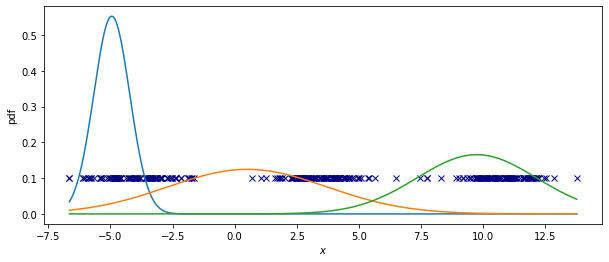

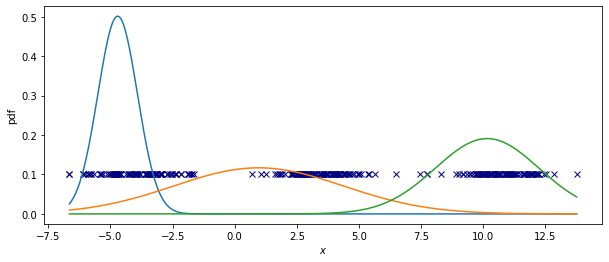

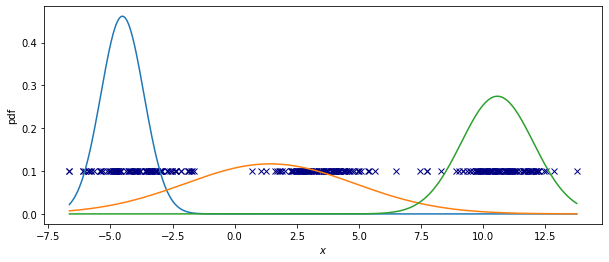

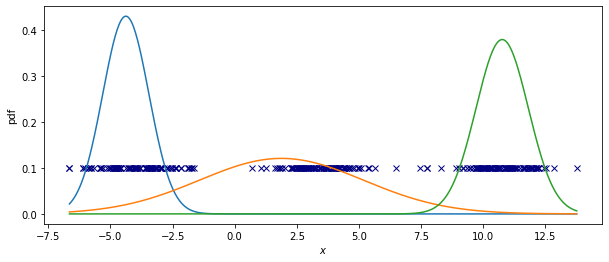

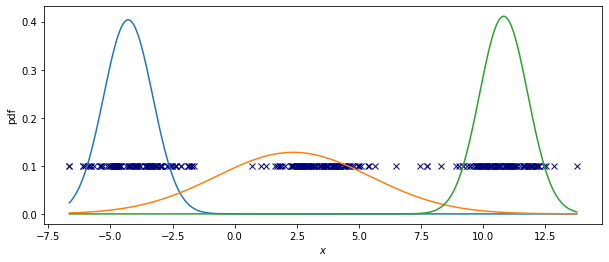

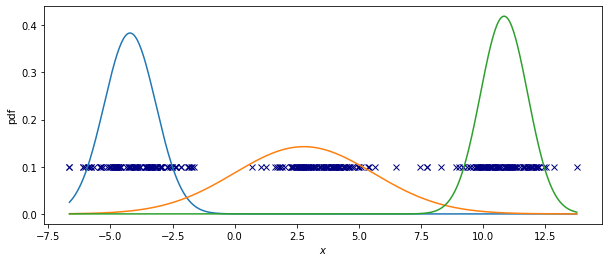

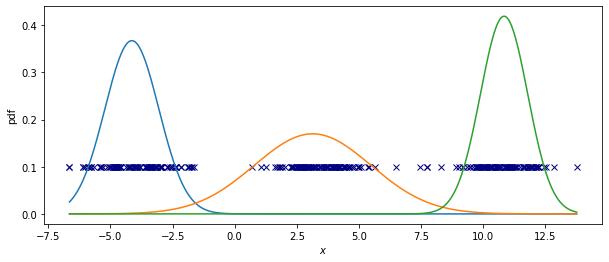

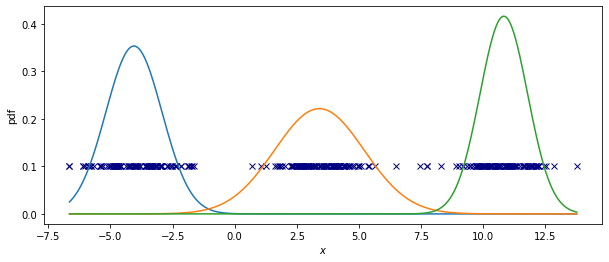

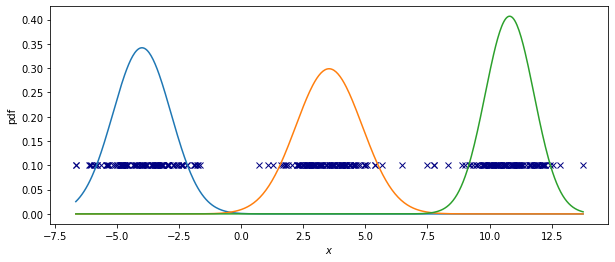

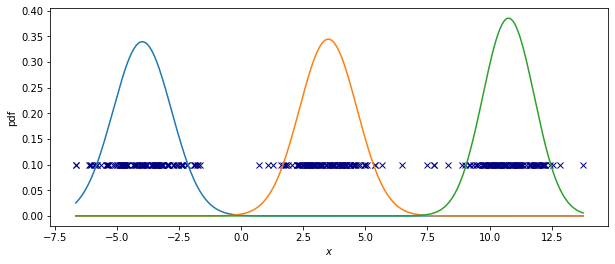

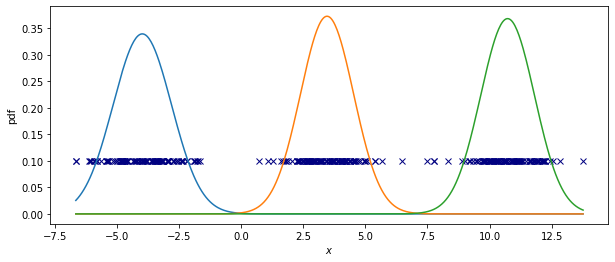

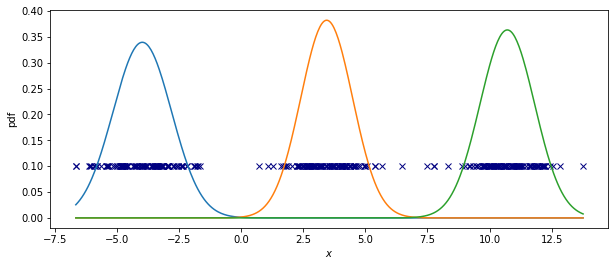

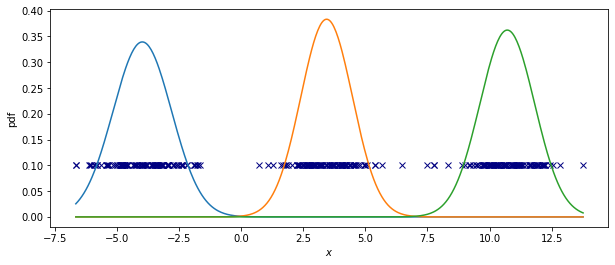

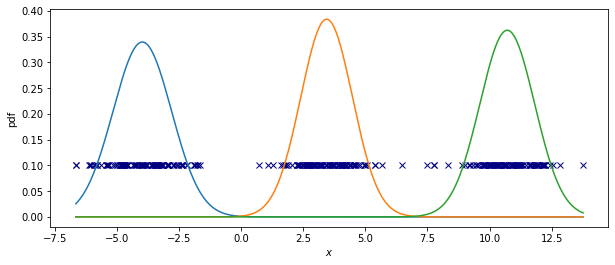

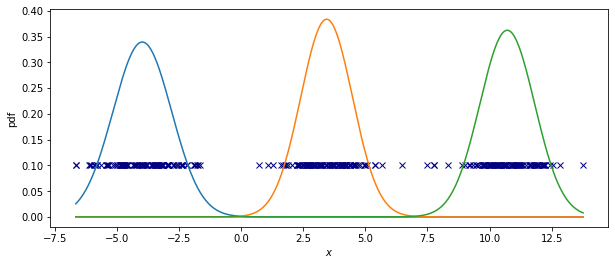

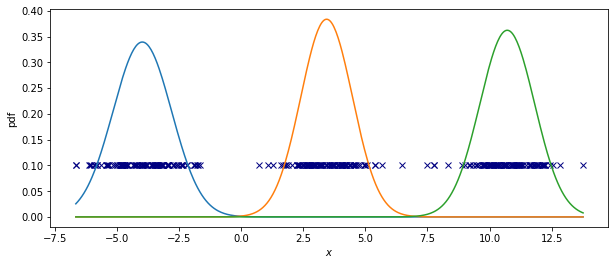

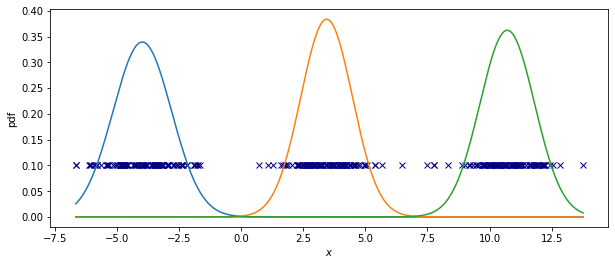

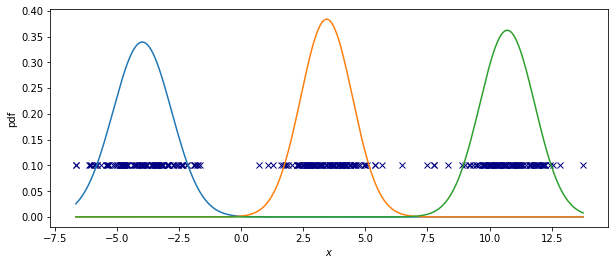

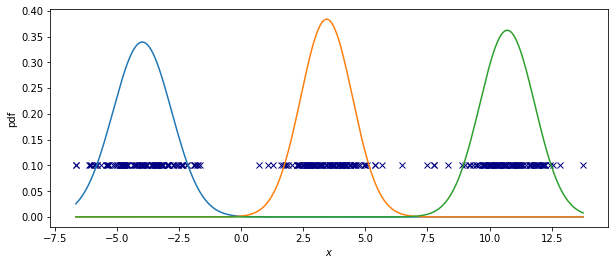

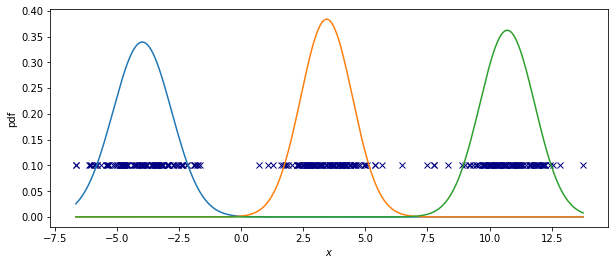

In [188]:
data=Data1D().X
gmm=GaussianMixtureModel1D(data,3)
gmm.exp_maximize(20)